# Purpose
To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.

# Dataset
This dataset is created for prediction of graduate admissions and the dataset link is below:

https://www.kaggle.com/mohansacharya/graduate-admissions
Features in the dataset:

GRE Scores (290 to 340)
TOEFL Scores (92 to 120)
University Rating (1 to 5)
Statement of Purpose (1 to 5)
Letter of Recommendation Strength (1 to 5)
Undergraduate CGPA (6.8 to 9.92)
Research Experience (0 or 1)
Chance of Admit (0.34 to 0.97)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv",sep = ",")

# Basic Information about Dataset
Some important information:

There are 9 columns: Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit
There are no null records. It's good.
There are 400 samples in total. That's enough.

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# heatmap()

seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

	
data : rectangular dataset

2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

ax : matplotlib Axes, optional

Axes in which to draw the plot, otherwise use the currently-active Axes.

annot : bool or rectangular dataset, optional

If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data.

linewidths : float, optional

Width of the lines that will divide each cell.

fmt : string, optional

String formatting code to use when adding annotations.

cmap : matplotlib colormap name or object, or list of colors, optional

The mapping from data values to color space. If not provided, the default will depend on whether center is set.

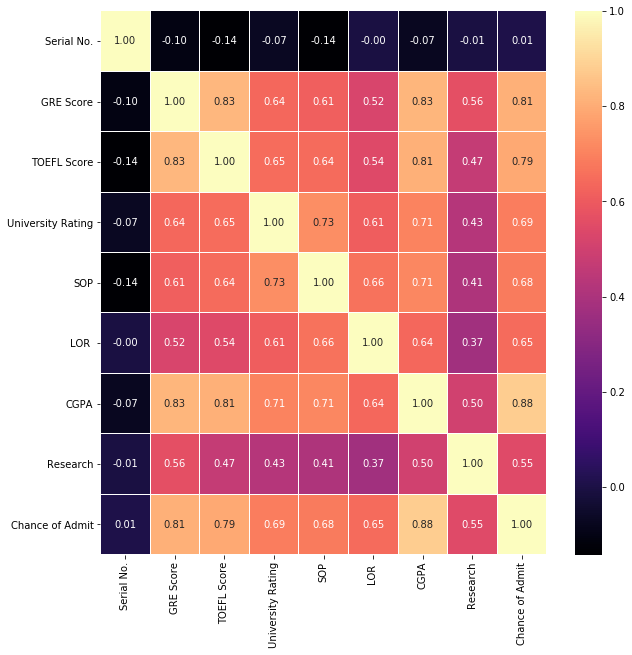

In [8]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

# DATA VISUALIZATION TO UNDERSTAND THE DATASET
Having Research or not:

The majority of the candidates in the dataset have research experience.
Therefore, the Research will be a unimportant feature for the Chance of Admit. The correlation between Chance of Admit and Research was already lower than other correlation values.

Not Having Research: 220
Having Research: 280


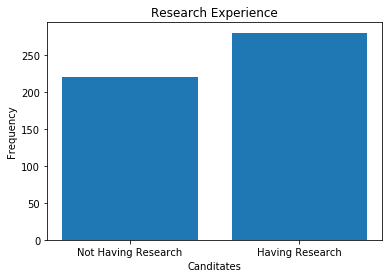

In [10]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

# TOEFL Score:

The lowest TOEFL score is 92 and the highest Toefl score is 120. The average is 107.41.

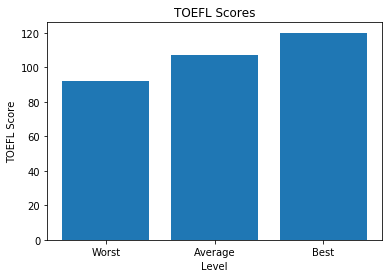

In [11]:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

# GRE Score:

This histogram shows the frequency for GRE scores.
There is a density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.

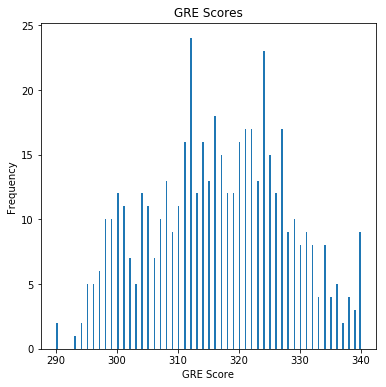

In [12]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

# CGPA Scores for University Ratings:

As the quality of the university increases, the CGPA score increases.

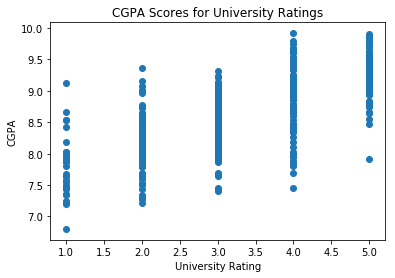

In [13]:
plt.scatter(df["University Rating"],df['CGPA'])
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

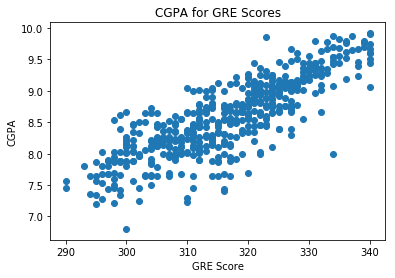

In [14]:
plt.scatter(df["GRE Score"],df['CGPA'])
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

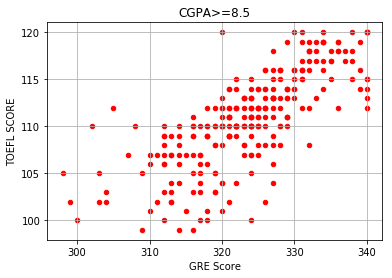

In [15]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

In [21]:
print(df["Chance of Admit"] >= 0.75) #True False series according to condition
print(df[df["Chance of Admit"] >= 0.75]) #records filtered where condition is True
print(df[df["Chance of Admit"] >= 0.75]["University Rating"]) #University rating of filtered records
print(df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts())

0       True
1       True
2      False
3       True
4      False
5       True
6       True
7      False
8      False
9      False
10     False
11      True
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23      True
24      True
25      True
26      True
27     False
28     False
29     False
       ...  
470     True
471    False
472     True
473    False
474    False
475    False
476    False
477    False
478    False
479     True
480     True
481     True
482     True
483    False
484    False
485    False
486    False
487     True
488     True
489    False
490    False
491    False
492    False
493    False
494    False
495     True
496     True
497     True
498    False
499     True
Name: Chance of Admit, Length: 500, dtype: bool
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1

Candidates who graduate from good universities are more fortunate to be accepted.

4    79
5    68
3    58
2    11
1     2
Name: University Rating, dtype: int64


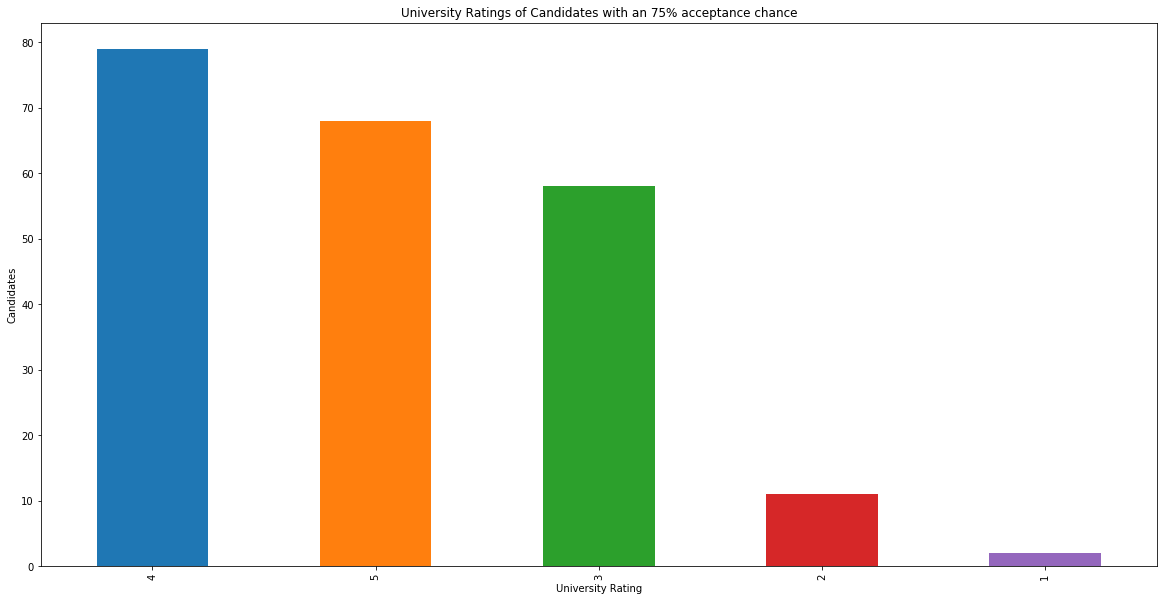

In [17]:
s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
print(s)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

Candidates with high CGPA scores usually have a high SOP score.

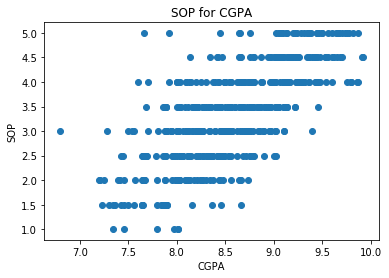

In [22]:
plt.scatter(df["CGPA"],df['SOP'])
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

Candidates with high GRE scores usually have a high SOP score.

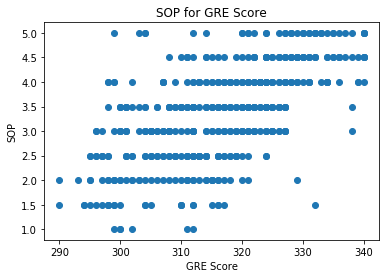

In [23]:
plt.scatter(df["GRE Score"],df["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

# REGRESSION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS
Preparing Data for Regression
Serial No. is deleted because it stores index values. In the future this column does not benefit for regression algorithms.

In [24]:
# reading the dataset
df = pd.read_csv("Admission_Predict_Ver1.1.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

train_test_split:

It splits the data into random train (80%) and test (20%) subsets.

In [27]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

Normalization (min-max scaling):

It makes values scaled to a fixed range (0-1).

In [26]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vaibv\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Note about r2_score:

It is the regression score function.
The best possible score is 1.0 for r2_score.
It may be negative.

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0.84 -> the predict: [0.79518127]
real value of y_test[2]: 0.39 -> the predict: [0.57265986]
r_square score:  0.818843256782963
r_square score (train dataset):  0.8210671369321554


# Random Forest Regression

class sklearn.ensemble.RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)[source]

	
n_estimators : integer, optional (default=10)
The number of trees in the forest.

Changed in version 0.20: The default value of n_estimators will change from 10 in version 0.20 to 100 in version 0.22.

random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

r_square score:  0.7884142689486551
real value of y_test[1]: 0.84 -> the predict: [0.7901]
real value of y_test[2]: 0.39 -> the predict: [0.6147]
r_square score (train dataset):  0.9681591391620332


# Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_square score:  0.57799511002445
real value of y_test[1]: 0.84 -> the predict: [0.85]
real value of y_test[2]: 0.39 -> the predict: [0.58]
r_square score (train dataset):  1.0


# Comparison of Regression Algorithms

Linear regression and random forest regression algorithms were better than decision tree regression algorithm.

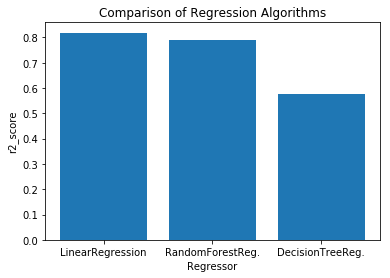

In [31]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

In [32]:
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(lr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[5],:])))

print()

print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(lr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[50],:])))

real value of y_test[5]: 0.89 -> the predict: [0.86206561]
real value of y_test[5]: 0.89 -> the predict: [0.8774]
real value of y_test[5]: 0.89 -> the predict: [0.87]

real value of y_test[50]: 0.93 -> the predict: [0.88805969]
real value of y_test[50]: 0.93 -> the predict: [0.8991]
real value of y_test[50]: 0.93 -> the predict: [0.87]


This is the estimate and the actual acceptance possibilities made with 3 regression algorithms for test samples with 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75 indexes:

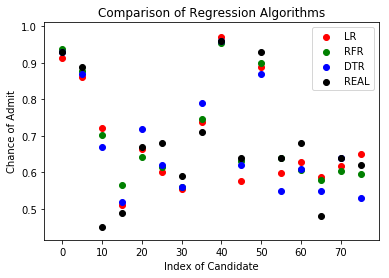

In [33]:
red = plt.scatter(np.arange(0,80,5),y_head_lr[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

Comment:

Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted.

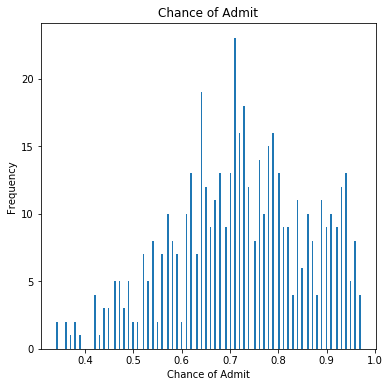

In [34]:
df["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()